In [44]:
#bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [45]:
#diretorios de trabalho
estados_brasileiros = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//estados_brasileiros.csv'
clientes = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//amostra_dados_clientes.xlsx'
idade_clientes = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//idade_clientes.csv'

In [46]:
#coletando dados de estados brasileiros
estados = pd.read_csv(estados_brasileiros, sep=';', encoding='latin-1')
#coletando dados de clientes
clientes = pd.read_excel(clientes)
# coletando dados de idade dos clientes
idade = pd.read_csv(idade_clientes, sep=';', encoding='latin-1')

In [47]:
#merge dos dados

clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,Amazonas,am,NaN
32,4,140.0,167,Feminino,24,Santa Catarina,sc,NaN
39,5,130.0,158,Masculino,26,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,Piauí,pi,NaN
77,224,102.0,116,Masculino,6,Ceará,ce,Brasil


In [48]:
#realiza juncao entre clientes e idades

base_completa = (
    pd
    .merge(clientes_estados, idade, on='id_cliente')
    .sort_values('id_cliente')
)

base_completa.sample(15)

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
122,166,120.0,144,Feminino,15,Paraíba,pb,Brasil,29
177,52,166.0,199,Masculino,22,Rondônia,ro,Brasil,34
12,49,128.0,154,Feminino,7,Distrito Federal,df,Brasil,38
72,138,203.0,231,Masculino,6,Ceará,ce,Brasil,39
141,198,173.0,211,Masculino,11,Mato Grosso,mt,Brasil,28
151,27,108.0,123,Feminino,21,Rio Grande do Sul,rs,Brasil,35
120,53,183.0,219,Masculino,15,Paraíba,pb,Brasil,30
8,204,125.0,148,Feminino,23,Roraima,rr,Brasil,21
138,160,171.0,212,Masculino,11,Mato Grosso,mt,Brasil,23
160,28,190.0,222,Feminino,20,Rio Grande do Norte,rn,Brasil,55


In [49]:
#deletar o index que esta bagunçado e criar um novo. 
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,Amazonas,am,NaN,62
3,4,140.0,167,Feminino,24,Santa Catarina,sc,NaN,55
4,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,Piauí,pi,NaN,24
223,224,102.0,116,Masculino,6,Ceará,ce,Brasil,31


In [50]:
#alterando o nome das colunas 
(
    base_completa
    .rename(columns={
        'id_cliente': 'cod_cliente',
        'genero_number': 'cod_genero'},
        inplace=True)
)

base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,Amazonas,am,NaN,62
32,4,140.0,167,Feminino,24,Santa Catarina,sc,NaN,55
39,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,Piauí,pi,NaN,24
77,224,102.0,116,Masculino,6,Ceará,ce,Brasil,31


In [51]:
#alterando as linhas da variavel sigla_estado para miusculas
base_completa['sigla_estado'] = (
    base_completa
    .sigla_estado
    .str
    .upper()
)

base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,Amazonas,AM,NaN,62
32,4,140.0,167,Feminino,24,Santa Catarina,SC,NaN,55
39,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,Rio Grande do Norte,RN,Brasil,33
126,222,116.0,138,Feminino,15,Paraíba,PB,Brasil,38
196,223,144.0,169,Feminino,18,Piauí,PI,NaN,24
77,224,102.0,116,Masculino,6,Ceará,CE,Brasil,31


In [52]:
base_completa = base_completa[['cod_cliente','genero','idade', 'peso', 'colesterol', 'id_estado',
       'estado', 'sigla_estado', 'pais']]

base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
21,3,Masculino,62,115.0,136,4,Amazonas,AM,NaN
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC,NaN
39,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
126,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
196,223,Feminino,24,144.0,169,18,Piauí,PI,NaN
77,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


Analisando a base de clientes no momento da coleta dos dados, sem nenhum tratamento, qual a media da variavel colesterol? 

In [53]:
round(clientes['colesterol'].mean(),2)

168.73

crie um histograma baseado na idade dos clientes e escolha alternativa que melhor a representa, utilize 20 barras na visualização **bins=20 

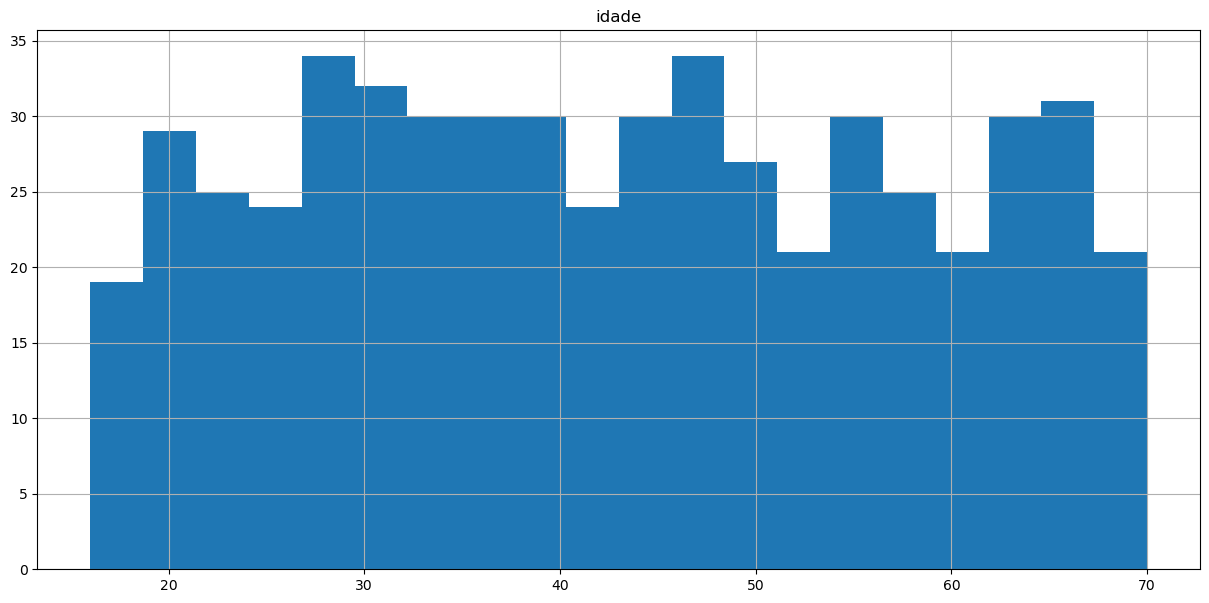

In [54]:
idade.hist(column= 'idade', figsize= (15,7), bins=20)
plt.show()


4º Crie o gráfico de WCSS para um conjunto de 10 clusters e, após análise dos dados no gráfico, responda: qual é o valor de WCSS para cluster de número 6? Considere apenas os 3 primeiros dígitos apresentados no gráfico.

In [62]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)
    
    return wcss


In [56]:
dados_cliente = base_completa[['peso','colesterol','idade']]
dados_cliente.head(10)

,peso,colesterol,idade
0,102.0,111,17
9,115.0,135,28
21,115.0,136,62
32,140.0,167,55
39,130.0,158,44
47,198.0,227,17
40,114.0,131,30
56,145.0,176,30
61,191.0,223,34
66,186.0,221,55


In [58]:
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
9,115.0,135,28
21,115.0,136,62
32,140.0,167,55
39,130.0,158,44


In [63]:
wcss_clientes = calcular_wcss(dados_cliente)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [64]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
